In [6]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import numpy as np
import os
from src.config import Config
from src.dataset import Dataset

import joblib

# Some EDA

In [2]:
train_df = pd.read_csv(os.path.join(Config.data_dir, 'train.csv'))
test_df = pd.read_csv(os.path.join(Config.data_dir, 'test.csv'))
submission_df = pd.read_csv(os.path.join(Config.data_dir, 'sample_submission.csv'))

In [3]:
train_df.tail()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
200835,Train_200835,22,7,2,র্খে
200836,Train_200836,65,9,0,ত্তো
200837,Train_200837,2,1,4,অ্যা
200838,Train_200838,152,9,0,স্নো
200839,Train_200839,127,2,0,ল্টি


In [5]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
grapheme_root,200840.0,86.415604,44.289815,0.0,53.0,85.0,123.0,167.0
vowel_diacritic,200840.0,3.357757,3.075717,0.0,1.0,2.0,7.0,10.0
consonant_diacritic,200840.0,1.277624,1.872504,0.0,0.0,0.0,2.0,6.0


In [33]:
def get_classes_distrib():
    
    vowels_distrib =  pd.DataFrame({
                    'Class' : list(dict(train_df.vowel_diacritic.value_counts()).keys()),
                    'counts' : list(dict(train_df.vowel_diacritic.value_counts()).values())

                })
                    
    grapheme_root_distrib = pd.DataFrame({
                    'Class' : list(dict(train_df.grapheme_root.value_counts()).keys()),
                    'counts' : list(dict(train_df.grapheme_root.value_counts()).values())

                })
    
    constant_distrib = pd.DataFrame({
                    'Class' : list(dict(train_df.consonant_diacritic.value_counts()).keys()),
                    'counts' : list(dict(train_df.consonant_diacritic.value_counts()).values())

                })
    
    return vowels_distrib, grapheme_root_distrib, constant_distrib




# Distributions analysis

In [152]:
def plot_distributions():    
    
    """
     Plot the distributions of the target classes
    """
    vowels_distrib, grapheme_root_distrib, constant_distrib = get_classes_distrib()

    fig , axes = plt.subplots(
        ncols=3, 
        nrows=1, 
        figsize=(23, 5),
        gridspec_kw={
                       'width_ratios': [1, 3, 1],
                       'height_ratios': [1]
                   }
    )
    # vowels distrib
    sb.barplot(data=vowels_distrib, x=vowels_distrib.Class, y=vowels_distrib.counts, ax=axes[0])
    axes[0].set_title('Vowels class distibution ')


    # grapheme root distrib
    sb.barplot(data=grapheme_root_distrib, x=grapheme_root_distrib.Class, y=grapheme_root_distrib.counts, ax=axes[1])
    axes[1].set_title('Grapheme roots class distibution (')
    plt.sca(axes[1])
    plt.xticks(rotation=0, ticks=[x for x in range(168) if x%5==0]) # show each 5 label for readability

    # constant distrib
    sb.barplot(data=constant_distrib, x=constant_distrib.Class, y=constant_distrib.counts, ax=axes[2])
    axes[2].set_title('Constants class distibution')


    plt.show()
    
    
def get_percentages():
    """
         Get the percentages of majoritary classes in the train dataset
    """
    vowel_max_pct = (vowels_distrib['counts'].max() / len(train_df)) * 100
    majoritary_vowel_class = vowels_distrib[vowels_distrib['counts']==vowels_distrib['counts'].max()].Class[0]

    grapheme_root_max_pct = (grapheme_root_distrib['counts'].max() / len(train_df)) * 100
    majoritary_grapheme_root_class = grapheme_root_distrib[grapheme_root_distrib['counts']==grapheme_root_distrib['counts'].max()].Class[0]

    constants_max_pct = (constant_distrib['counts'].max() / len(train_df)) * 100
    majoritary_constant_class = constant_distrib[constant_distrib['counts']==constant_distrib['counts'].max()].Class[0]
    
    print(f'[INFO] Majoritary class in vowels : {majoritary_vowel_class}, \t\t percentage :  {round(vowel_max_pct)}% of the wole dataset')
    print(f'[INFO] Majoritary class in grapheme root: {majoritary_grapheme_root_class}, \t percentage :  {round(grapheme_root_max_pct)}% of the wole dataset')
    print(f'[INFO] Majoritary class in constant : {majoritary_constant_class}, \t percentage :  {round(constants_max_pct)}% of the wole dataset')

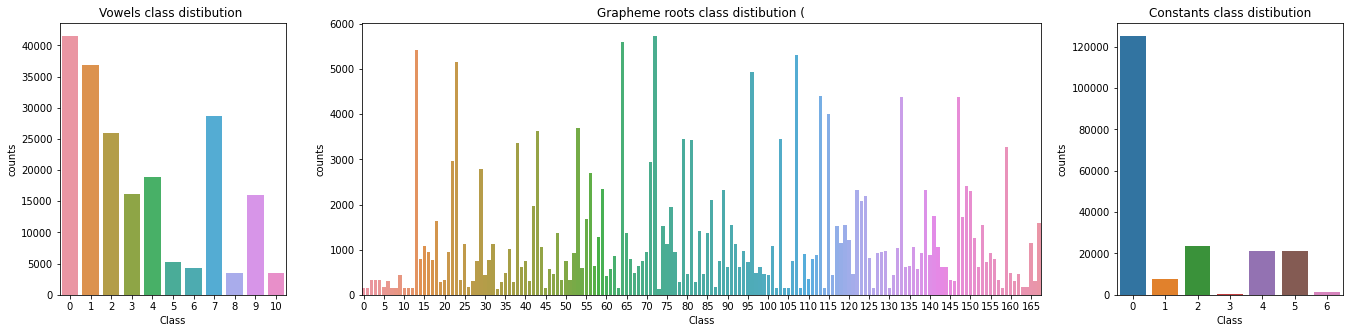

In [151]:
plot_distributions()

## Conslusion 
Obviously we conclude that we have a 3X imbalance datasets probleme to solve.


In [150]:
get_percentages()

[INFO] Majoritary class in vowels : 0, 		 percentage :  21% of the wole dataset
[INFO] Majoritary class in grapheme root: 72, 	 percentage :  3% of the wole dataset
[INFO] Majoritary class in constant : 0, 	 percentage :  62% of the wole dataset
